# 분류 모델: logistic regression

### 데이터 불러오기 및 기본 정보 확인

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [102]:
df = pd.read_csv('/Users/zoohunn/Desktop/비어플/diabetes.csv')
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [104]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [108]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

칼럼 dtype이 모두 실수형이고, null값이 존재하지 않는다

In [111]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Glucose, BloodPressure, SkinThickness, Insulin, BMI의 최솟값이 0이거나 피처값들이 0인 값들이 존재하는 것에 대해 결측치에 대한 처리를 그렇게 했을수도 있다는 의심이 들어 각 피처들에 대해 0의 분포가 어떻게 되는지 시각적으로 각각 확인해본다.

<Axes: xlabel='Glucose', ylabel='Count'>

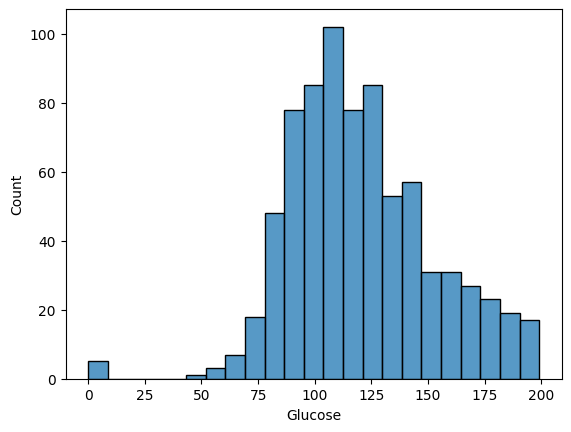

In [114]:
sns.histplot(x=df['Glucose'])

<Axes: xlabel='BloodPressure', ylabel='Count'>

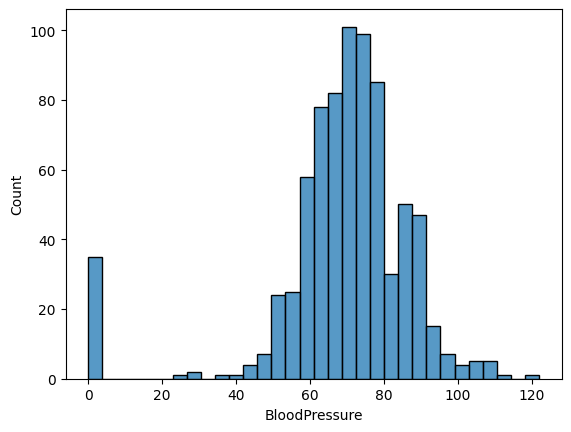

In [116]:
sns.histplot(x=df['BloodPressure'])

<Axes: xlabel='SkinThickness', ylabel='Count'>

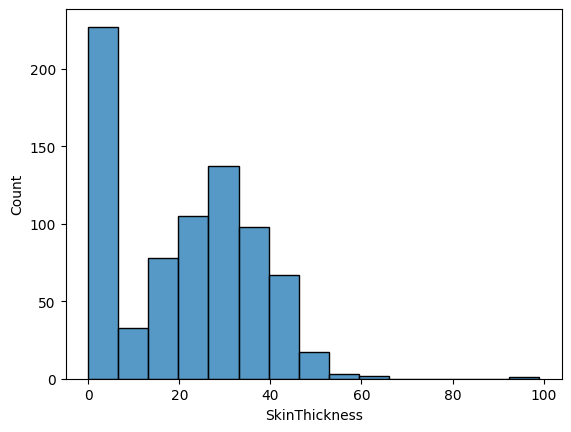

In [118]:
sns.histplot(x=df['SkinThickness'])

<Axes: xlabel='Insulin', ylabel='Count'>

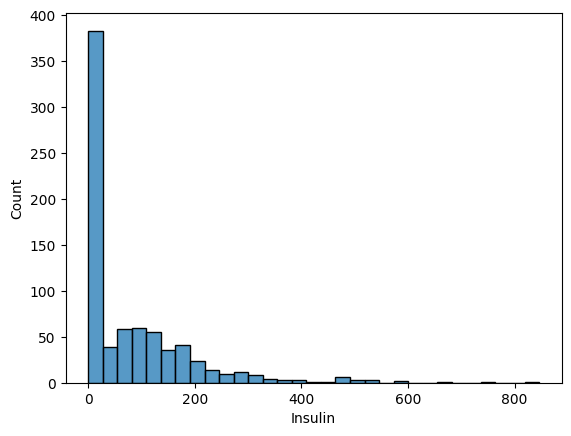

In [120]:
sns.histplot(x=df['Insulin'])

<Axes: xlabel='BMI', ylabel='Count'>

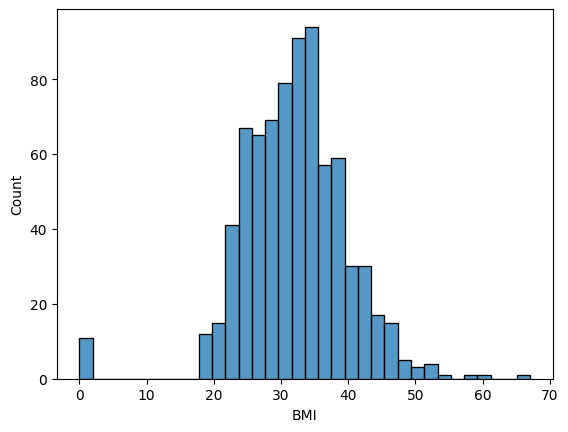

In [122]:
sns.histplot(x=df['BMI'])

Glucose, BloodPressure, BMI 열은 연속적인 숫자의 분포에 반해 0값 주변 분포에는 값이 존재하지 않음을 보았을때, 결측치를 0으로 처리했다고 볼 수 있다.   
SkinThickness, Insulin 열은 0의 값이 데이터 중 꽤 많은 비율을 차지해 적절한 값으로 대체할 필요가 있다. 그러므로 SkinThickness, Insulin열의 0값을 median으로 대체해준다.

In [125]:
zero_columns = ['SkinThickness', 'Insulin']
df[zero_columns] = df[zero_columns].replace(0, np.nan)
df.fillna(df.median(), inplace=True)
print(df.isnull().sum())
df.head(10)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.0,125.0,33.6,0.627,50,1
1,1,85,66,29.0,125.0,26.6,0.351,31,0
2,8,183,64,29.0,125.0,23.3,0.672,32,1
3,1,89,66,23.0,94.0,28.1,0.167,21,0
4,0,137,40,35.0,168.0,43.1,2.288,33,1
5,5,116,74,29.0,125.0,25.6,0.201,30,0
6,3,78,50,32.0,88.0,31.0,0.248,26,1
7,10,115,0,29.0,125.0,35.3,0.134,29,0
8,2,197,70,45.0,543.0,30.5,0.158,53,1
9,8,125,96,29.0,125.0,0.0,0.232,54,1


In [127]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,29.108073,140.671875,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,8.791221,86.383060,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,25.000000,121.500000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


모델의 일반화 성능을 위해 이상치 함수 정의 후, 각 열의 이상치를 제거해준다.

In [130]:
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

for col in df.columns[:-1]:
    df = remove_outliers(df, col)

In [140]:
# 이상치 제거 후 크기
df.shape

(369, 9)

로지스틱 회귀는 선형 모델 기반의 분류 알고리즘이다.    
이 모델을 학습할 때, 피처들의 값이 서로 다른 범위를 가지면 학습이 비효율적이거나 부정확할 수 있다고 한다.   
위 데이터를 둘러본 결과, 각 피처들의 범위가 다르므로 일반적으로 로지스틱 회귀모델일 경우 사용하는 정규화를 수행해준다.

In [147]:
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['Outcome'])
y = df['Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 로지스틱 회귀 모델 이용

In [150]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [160]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"로지스틱 회귀 정확도: {accuracy:.4f}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

로지스틱 회귀 정확도: 0.7297
[[43  6]
 [14 11]]
              precision    recall  f1-score   support

           0       0.75      0.88      0.81        49
           1       0.65      0.44      0.52        25

    accuracy                           0.73        74
   macro avg       0.70      0.66      0.67        74
weighted avg       0.72      0.73      0.71        74



### GridSearchCV로 하이퍼 파라미터 튜닝

In [170]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  
    'penalty': ['l1', 'l2'],  # l1이 
    'solver': ['liblinear', 'saga']  
}

grid_search = GridSearchCV(LogisticRegression(max_iter=5000), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("최적의 하이퍼파라미터:", grid_search.best_params_)
print("최고 교차 검증 정확도: {:.4f}".format(grid_search.best_score_))

최적의 하이퍼파라미터: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
최고 교차 검증 정확도: 0.7525


### 최적의 모델로 다시 평가

In [174]:
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"테스트 데이터 정확도: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

테스트 데이터 정확도: 0.7838
              precision    recall  f1-score   support

           0       0.79      0.92      0.85        49
           1       0.76      0.52      0.62        25

    accuracy                           0.78        74
   macro avg       0.78      0.72      0.73        74
weighted avg       0.78      0.78      0.77        74

